In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

df = pd.read_csv('Iceland\ISL_adm1.csv')

In [2]:
df.head()

,OBJECTID,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1
0,1,104,ISL,Iceland,1,Austurland,Landsvæði,Region,NaN,Eastland
1,2,104,ISL,Iceland,2,Hálshreppur,Landsvæði,Region,NaN,Norðurland eystra|Northland East
2,3,104,ISL,Iceland,3,Höfuðborgarsvæði,Landsvæði,Region,NaN,Capital|Reykjavik and Reykjane
3,4,104,ISL,Iceland,4,Norðurland vestra,Landsvæði,Region,NaN,Northland West
4,5,104,ISL,Iceland,5,Suðurland,Landsvæði,Region,NaN,Southland|South


In [3]:
df

,OBJECTID,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1
0,1,104,ISL,Iceland,1,Austurland,Landsvæði,Region,NaN,Eastland
1,2,104,ISL,Iceland,2,Hálshreppur,Landsvæði,Region,NaN,Norðurland eystra|Northland East
2,3,104,ISL,Iceland,3,Höfuðborgarsvæði,Landsvæði,Region,NaN,Capital|Reykjavik and Reykjane
3,4,104,ISL,Iceland,4,Norðurland vestra,Landsvæði,Region,NaN,Northland West
4,5,104,ISL,Iceland,5,Suðurland,Landsvæði,Region,NaN,Southland|South
5,6,104,ISL,Iceland,6,Suðurnes,Kaupstadir,Independent Town,NaN,Southern Peninsula
6,7,104,ISL,Iceland,7,Vestfirðir,Landsvæði,Region,NaN,Western Fjords|Western Peninsula
7,8,104,ISL,Iceland,8,Vesturland,Landsvæði,Region,NaN,Westland|West


In [4]:
# this lets us use the figures interactively
%matplotlib notebook

import geopandas as gpd
import matplotlib.pyplot as plt
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

plt.ion() # make the plotting interactive

# generate matplotlib handles to create a legend of the features we put in our map.
def generate_handles(labels, colors, edge='k', alpha=1):
    lc = len(colors)  # get the length of the color list
    handles = []
    for i in range(len(labels)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % lc], edgecolor=edge, alpha=alpha))
    return handles

# create a scale bar of length 20 km in the upper right corner of the map
def scale_bar(ax, location=(0.92, 0.95)):
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]

    tmc = ccrs.TransverseMercator(sbllx, sblly)
    x0, x1, y0, y1 = ax.get_extent(tmc)
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    plt.plot([sbx, sbx - 20000], [sby, sby], color='k', linewidth=9, transform=tmc)
    plt.plot([sbx, sbx - 10000], [sby, sby], color='k', linewidth=6, transform=tmc)
    plt.plot([sbx-10000, sbx - 20000], [sby, sby], color='w', linewidth=6, transform=tmc)

    plt.text(sbx, sby-4500, '20 km', transform=tmc, fontsize=8)
    plt.text(sbx-12500, sby-4500, '10 km', transform=tmc, fontsize=8)
    plt.text(sbx-24500, sby-4500, '0 km', transform=tmc, fontsize=8)

# load the outline of Northern Ireland for a backdrop
outline = gpd.read_file('Iceland/ISL_adm0.shp')

In [5]:
roads = gpd.read_file('Iceland/roads.shp')
rivers = gpd.read_file('Iceland/waterways.shp')
railways = gpd.read_file('Iceland/railways.shp')
water = gpd.read_file('Iceland/natural.shp')
points = gpd.read_file('Iceland/points.shp')
counties = gpd.read_file ('Iceland/ISL_adm1.shp')

<IPython.core.display.Javascript object>


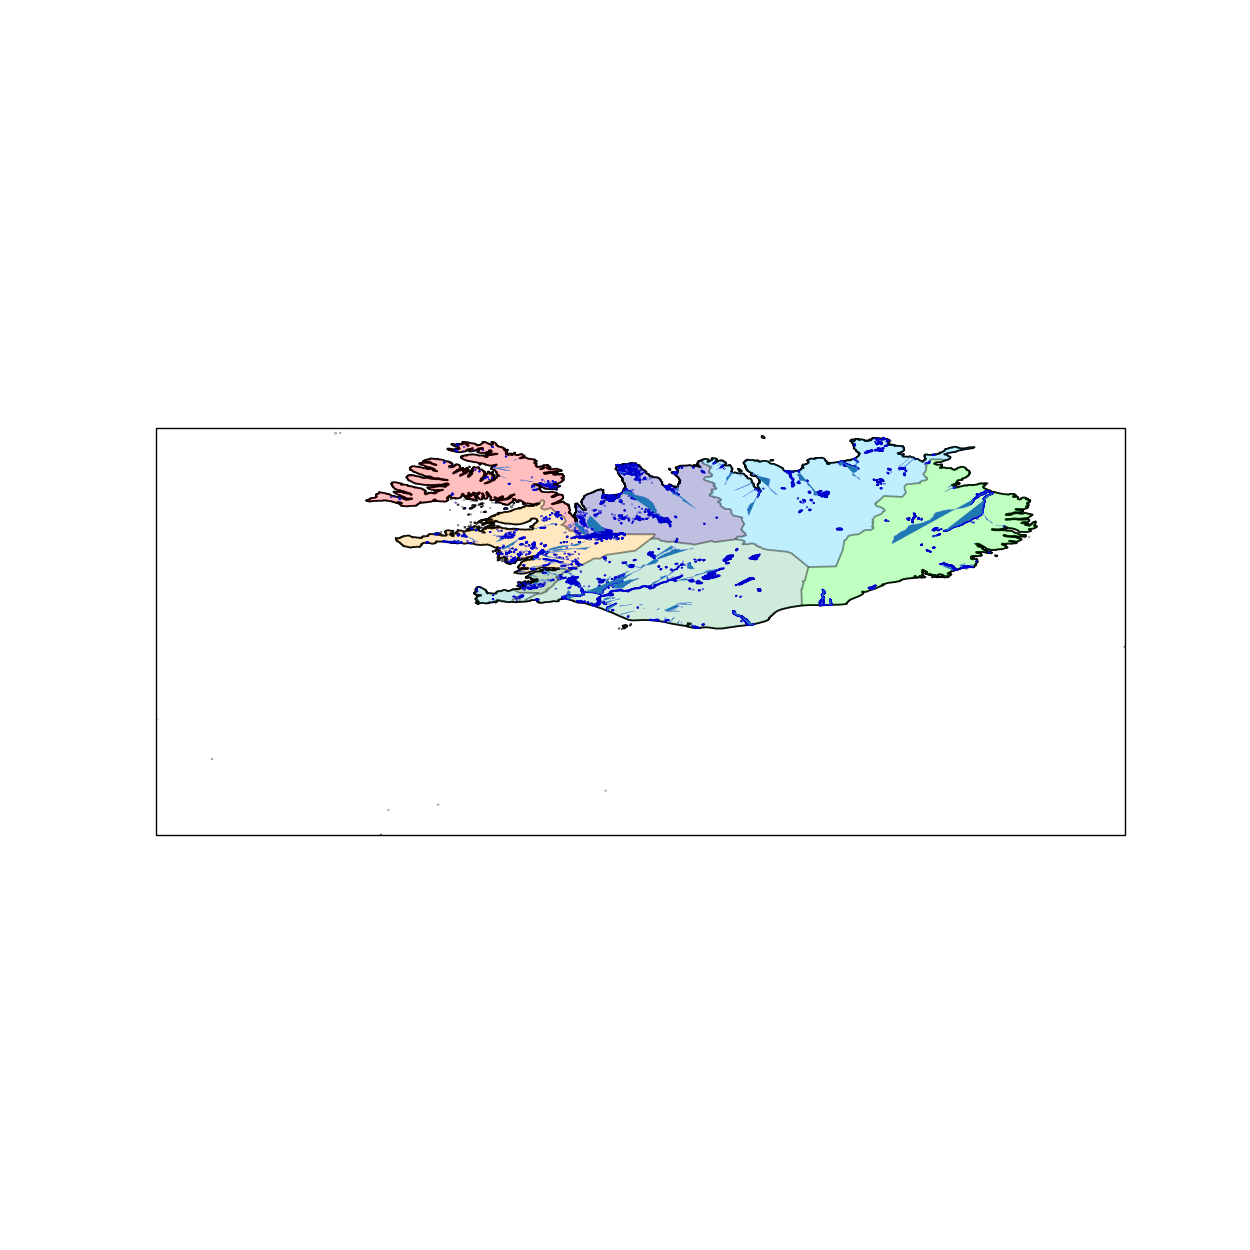

<IPython.core.display.Javascript object>


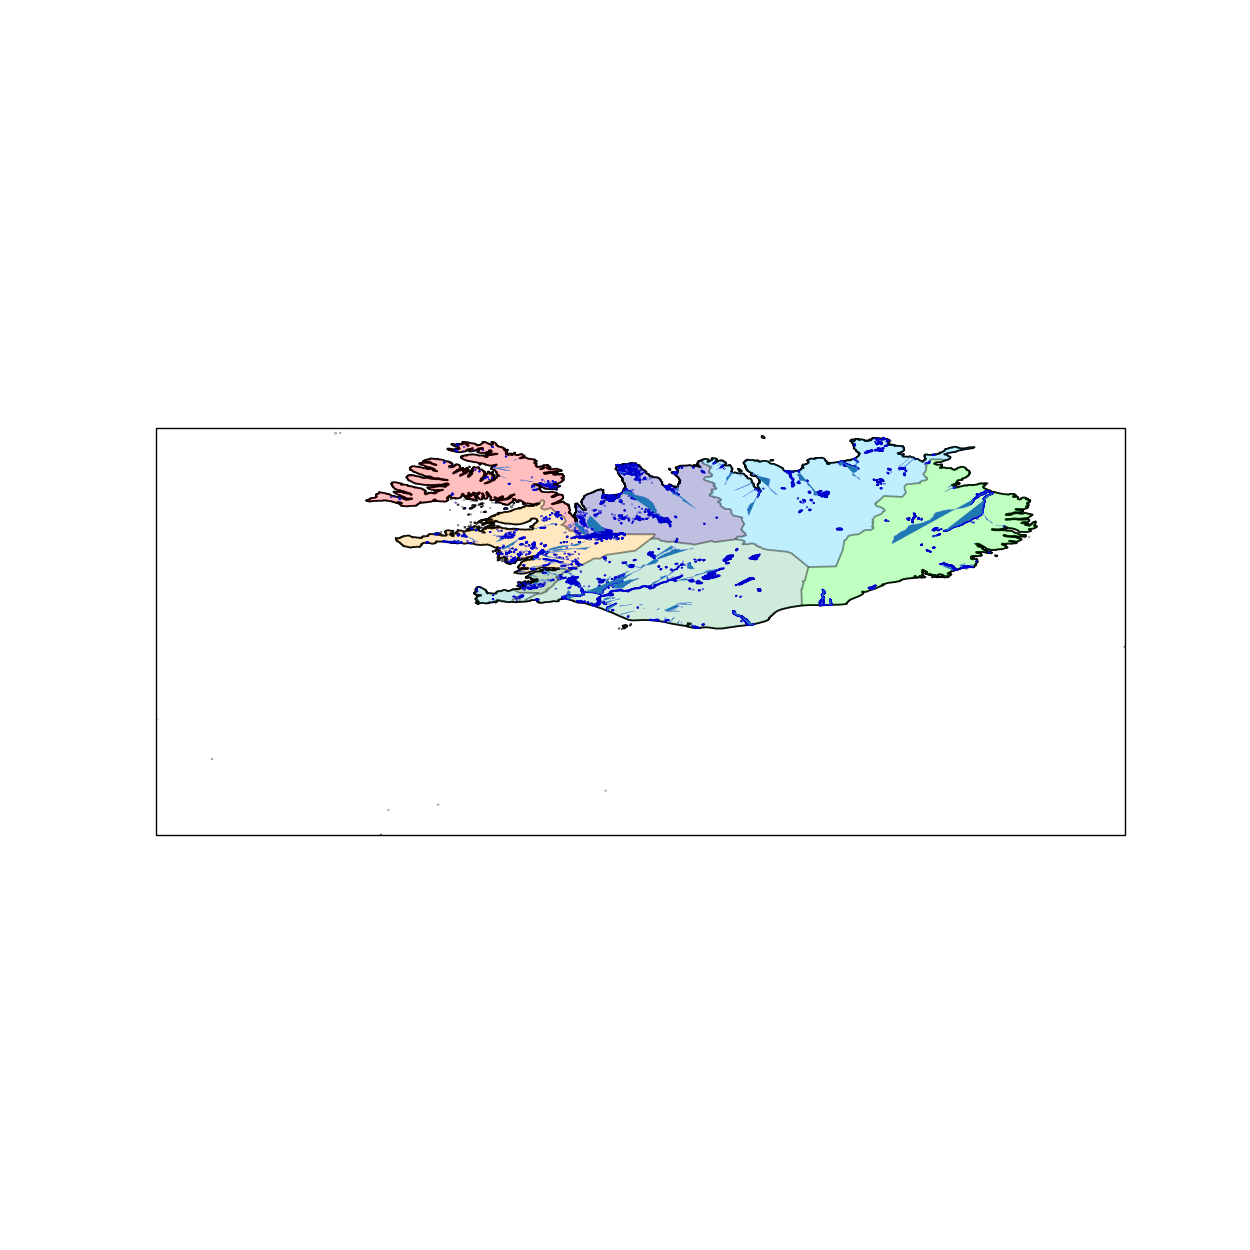

In [6]:
myFig = plt.figure(figsize=(10, 10))  # create a figure of size 10x10 (representing the page size in inches)

myCRS = ccrs.UTM(27)  # create a Universal Transverse Mercator reference system to transform our data.
# be sure to fill in XX above with the correct number for the area we're working in.

ax = plt.axes(projection=ccrs.Mercator())  # finally, create an axes object in the figure, using a Mercator
# projection, where we can actually plot our data.

myFig

<IPython.core.display.Javascript object>


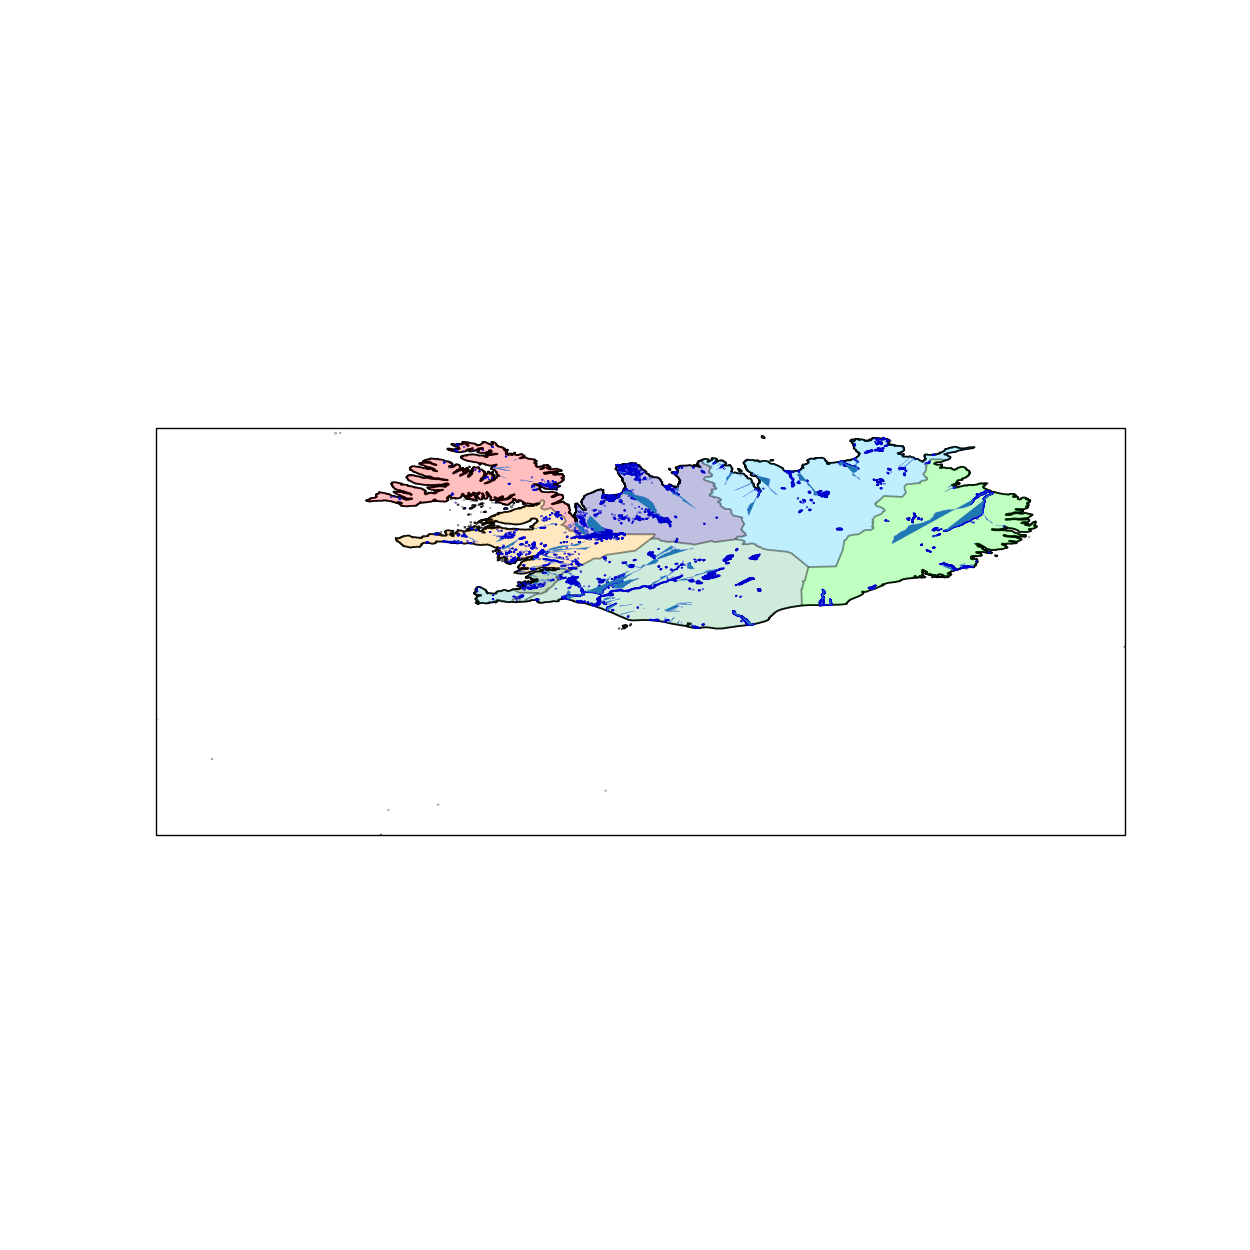

In [7]:
# first, we just add the outline of Northern Ireland using cartopy's ShapelyFeature
outline_feature = ShapelyFeature(outline['geometry'], myCRS, edgecolor='k', facecolor='w')
xmin, ymin, xmax, ymax = outline.total_bounds
ax.add_feature(outline_feature) # add the features we've created to the map.

# using the boundary of the shapefile features, zoom the map to our area of interest
ax.set_extent([xmin, xmax, ymin, ymax], crs=myCRS) # because total_bounds gives output as xmin, ymin, xmax, ymax,
# but set_extent takes xmin, xmax, ymin, ymax, we re-order the coordinates here.

myFig # re-display the figure here.

In [8]:
# get the number of unique municipalities we have in the dataset
num_counties = len(counties.VARNAME_1.unique())
print('Number of unique features: {}'.format(num_counties)) # note how we're using {} and format here!

Number of unique features: 8


<IPython.core.display.Javascript object>


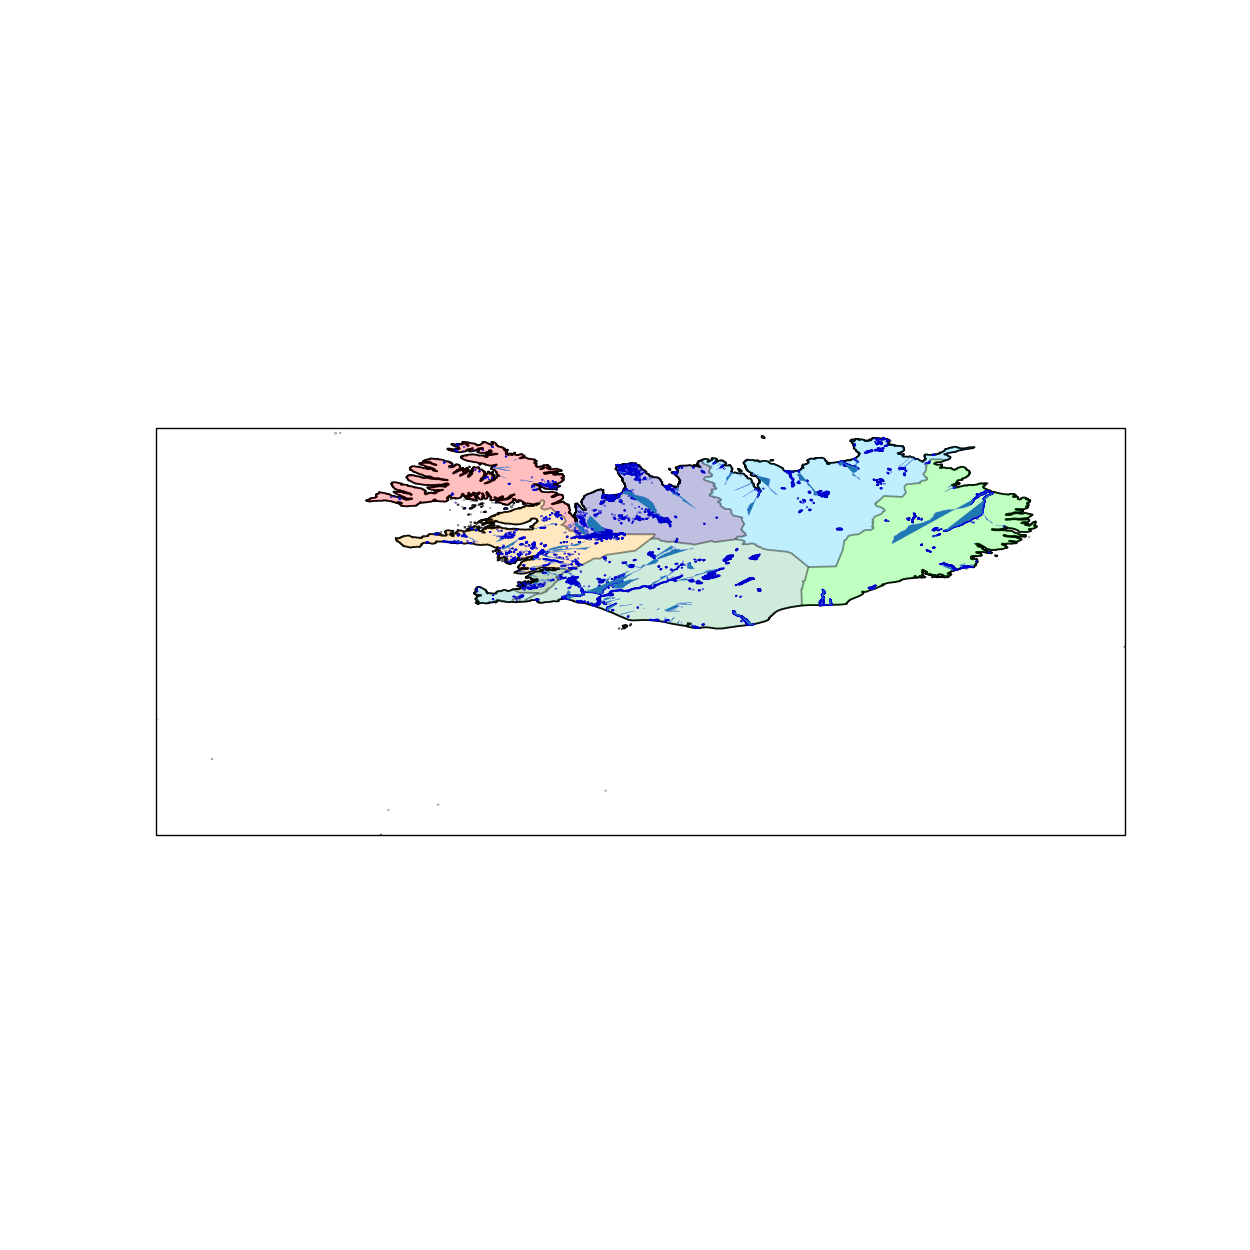

In [9]:
# pick colors for the individual county boundaries - make sure to add enough for each of the counties
# to add a color, enclose the name above (e.g., violet) with single (or double) quotes: 'violet'
# remember that each colors should be separated by a comma
county_colors = ['darkgreen','lime','darkblue','deepskyblue','lightseagreen','mediumseagreen','red','orange']

# get a list of unique names for the county boundaries
county_names = list(counties.VARNAME_1.unique())
county_names.sort() # sort the counties alphabetically by name

# next, add the municipal outlines to the map using the colors that we've picked.
# here, we're iterating over the unique values in the 'CountyName' field.
# we're also setting the edge color to be black, with a line width of 0.5 pt. 
# Feel free to experiment with different colors and line widths.
for i, name in enumerate(county_names):
    feat = ShapelyFeature(counties['geometry'][counties['VARNAME_1'] == name], myCRS, 
                          edgecolor='k',
                          facecolor=county_colors[i],
                          linewidth=1,
                          alpha=0.25)
    ax.add_feature(feat)

myFig # to show the updated figure

<IPython.core.display.Javascript object>


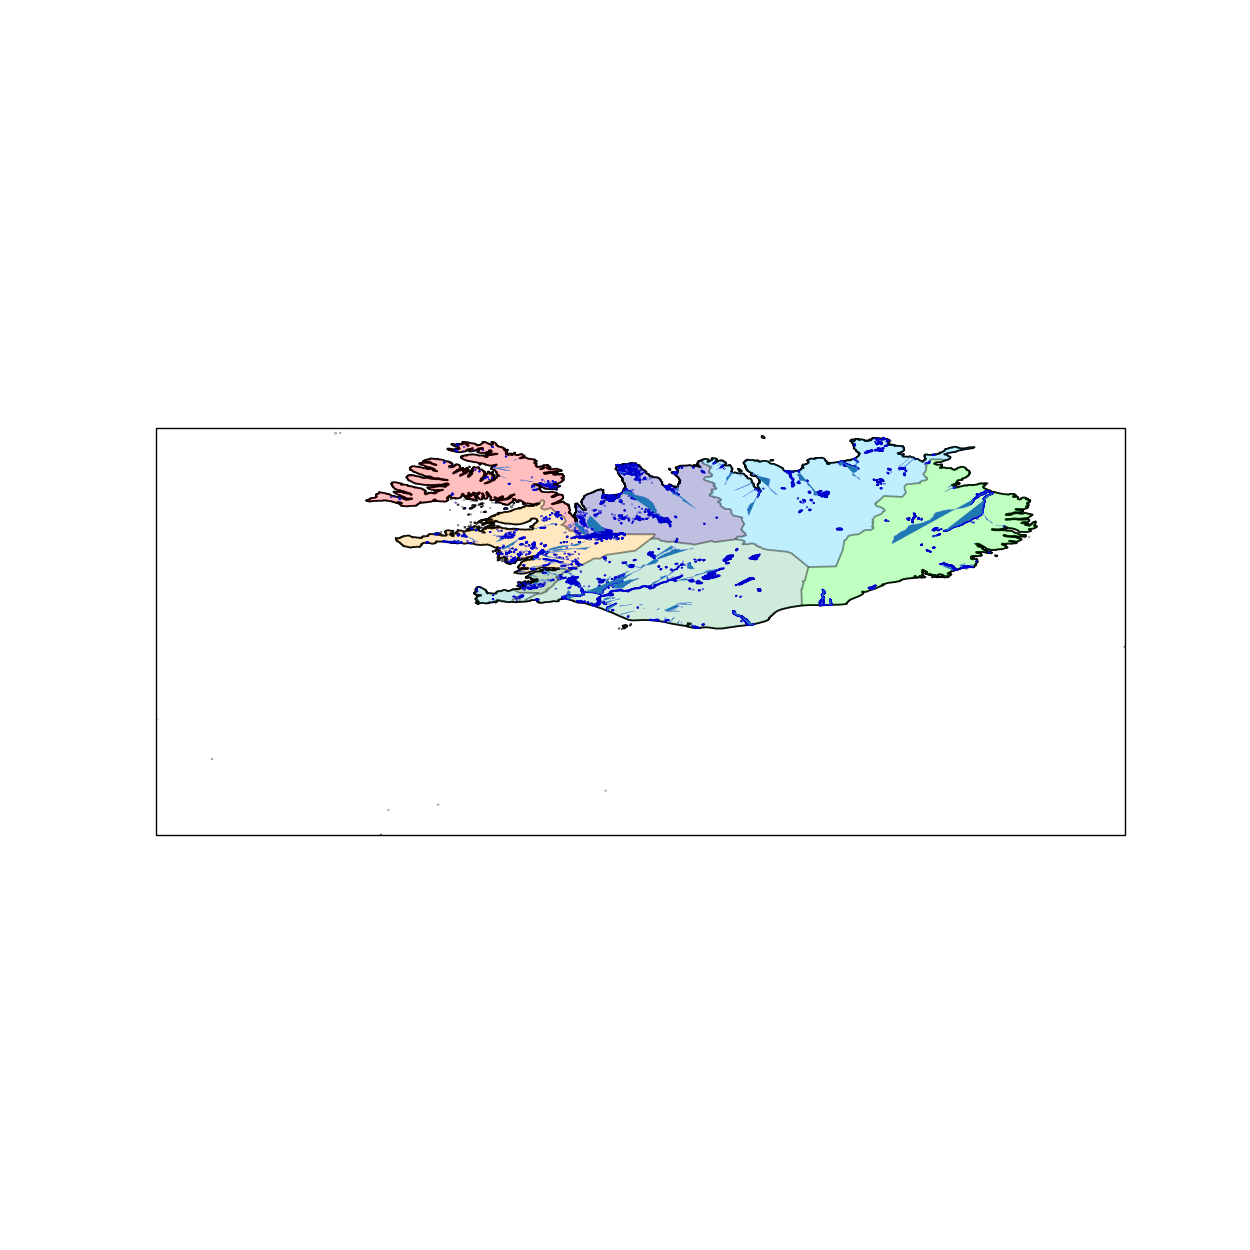

In [11]:
# here, we're setting the edge color to be the same as the face color. Feel free to change this around,
# and experiment with different line widths.
water_feat = ShapelyFeature(water['geometry'], myCRS, 
                            edgecolor='mediumblue', 
                            facecolor='mediumblue',
                            linewidth=1)
ax.add_feature(water_feat)

myFig # to show the updated figure

<IPython.core.display.Javascript object>


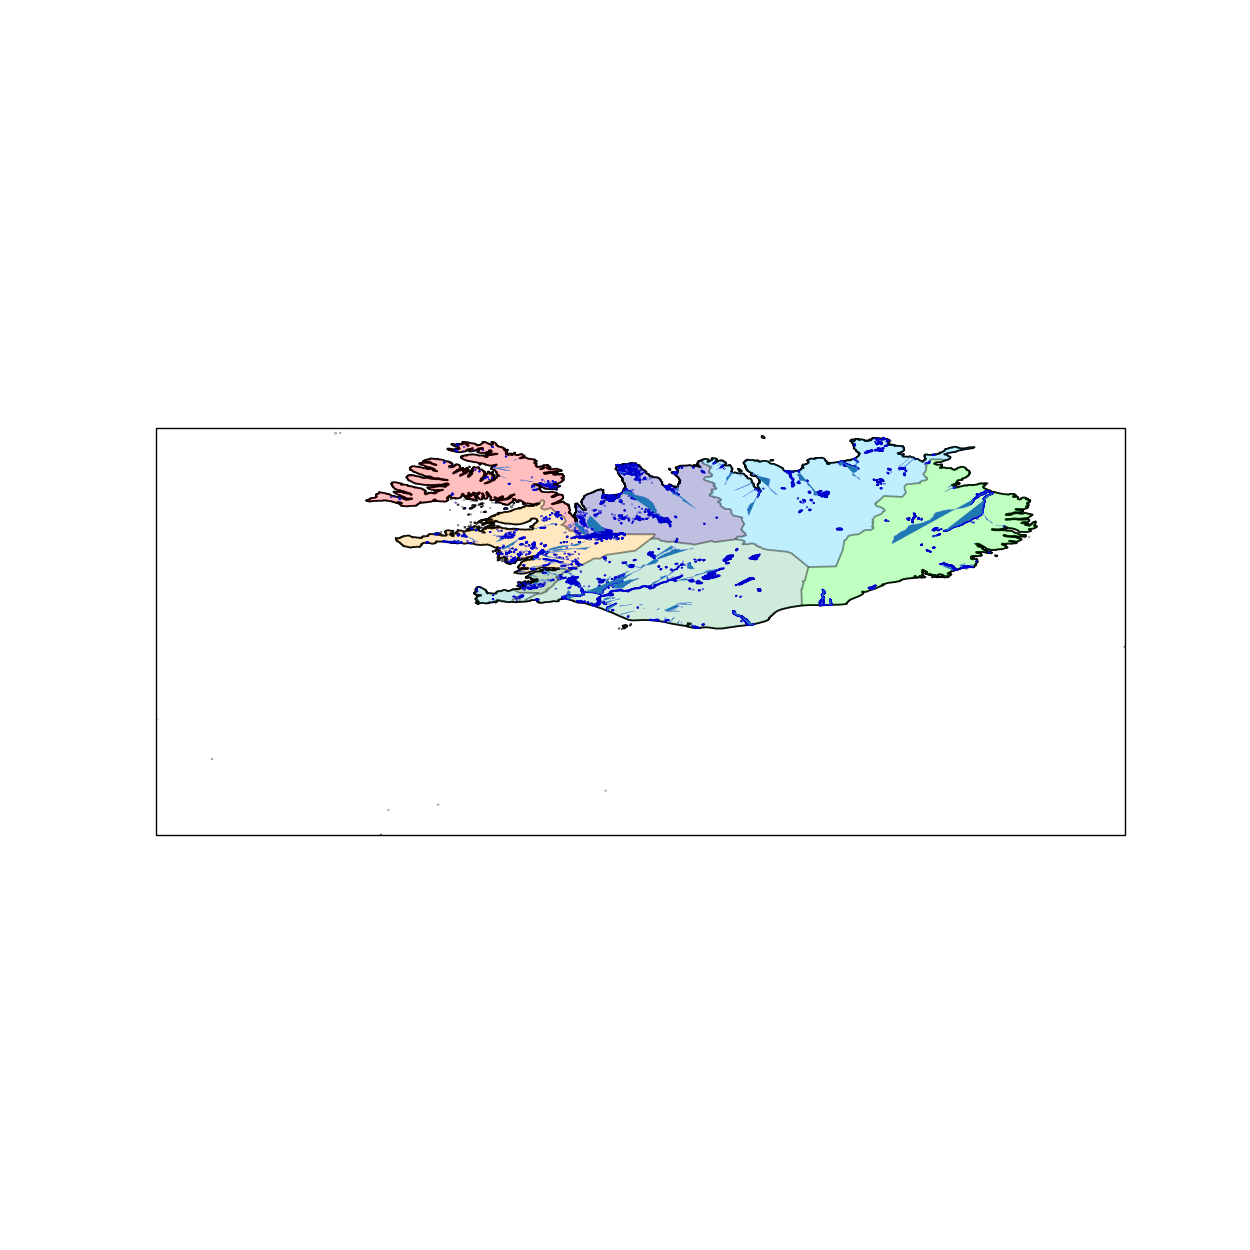

In [12]:
rivers_feat = ShapelyFeature(rivers['geometry'], myCRS,
                            edgecolor='royalblue',
                            linewidth=0.2)

ax.add_feature(rivers_feat)
myFig # to show the updated figure

In [14]:
# ShapelyFeature creates a polygon, so for point data we can just use ax.plot()
counties_handle = ax.plot(NAME_1.geometry.x, NAME_1.geometry.y, 's', color='0.5', ms=6, transform=myCRS)

myFig #to show the updated figure

NameError: name 'NAME_1' is not defined